## Dimostrazione del teorema del limite centrale

In questo foglio si vuole testare il teorema del limite centrale per tre tipi di pdf: Uniforme (nell'intervallo $[0,1)$ ), esponenziale (nell'intervallo $ [0, \infty)$) e lorentziana (su $R$). In particolare si considerino le variabili aleatorie 

$$S_N[p](x) = \frac{1}{N} \sum_i^N x_i$$

nei 4 casi $N = 1, 2, 10, 100$, dove $p$ sta a indicare quale delle 3 diverse pdf si sta utilizzando per la variabile $x$. A partire dalla media $\mu$ e dalla varianza $\sigma$ della singola variabile aleatoria $x$, se il teorema è corretto, la variabile $S_N$ così costruita dovrà tendere, all'aumentare di $N$, a una normale $\mathcal{N}(\mu, \frac{\sigma}{\sqrt N})$. In questa forma il teorema è valido solo per le due distribuzioni uniforme ed esponenziale, per le quali la varianza è una quantità ben definita: per la Lorentziana una generalizzazione del teorema afferma che la varibaile $S_N$ tende a una Lorentziana.

Per verificare il teorema quindi plotteremo per le 3 pdf 4 istogrammi rappresentanti l'esito di $10^4$ realizzazioni della variabile $S_N$ con $N = 1, 2, 5, 100$. Una volta riscalati i risultati in modo che siano confrontabili tra loro, dovrebbe emergere un risultato "sempre più gaussiano" nei primi due casi, e lorentziano nell'ultimo.
Per mostrare questo aspetto plotteremo anche un funzione che fitti i punti dell'istogramma con $N = 100$, e la confronteremo con la distribuzione attesa (Gaussiana nei primi due casi e Lorentziana nell'ultimo).

Ossrviamo che per le quantità $\mu$ e $\sigma$ bisogna usare i valori teorici, ovvero quelli calcolati tramite la definizione 

$$\mu = \int_R xp(x) dx $$ $$\sigma^2 = \int_R x^2p(x) dx -\mu^2 $$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x,a,b,c):  # Definzione della funzione Gaussiana
    return a * np.exp(-b*(x-c)**2)

def L(x, a, b):  # Definizione della funzione Lorentziana
    return (1/math.pi)*b/((x - a)**2 + b**2)


### 1. Distribuzione uniforme  $p(x) = 1,  x \in [0, 1)$

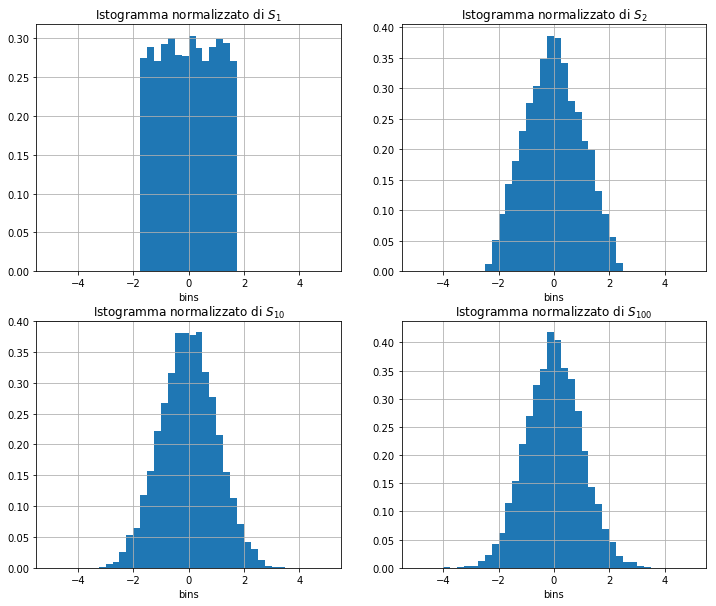

I parametri del fit sono:
0.3992315991507848 0.47577405935825934 -0.0021742590324152038 

I parametri di una normale N(0, 1) sono:
0.3989422804014327 0.5 0


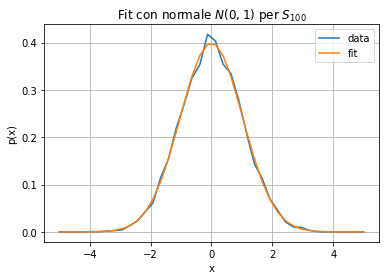

In [2]:
# Definisco il numero di bin in cui dividere l'istogramma e il range da includere 
# sull'asse x

n_bins = 40
width = 5

# Introduco le variabili media e deviazione standard teoriche (calcolate con 
# gli integrali sopra)
mean = 1/2
sigma = np.sqrt(1/12)

# Carico da file le realizzazioni delle 4 diverse variabili Medie
xI, xII, xV, xC = np.loadtxt("ST_dice.out", usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

# Introduco nuove variabili normalizzate in modo da:
#   -poter confrontare i diversi istogrammi fra loro
#   -poterli confrontare con una normale N(0, 1)
xI_n = (xI - mean)/sigma
xII_n = (xII - mean)/(sigma/(math.sqrt(2)))
xV_n = (xV - mean)/(sigma/(math.sqrt(10)))
xC_n = (xC - mean)/(sigma/(math.sqrt(100)))

# Definisco l'array multidimensionale...
v = [xI_n, xII_n, xV_n, xC_n]
# e dei nomi per i 4 grafici...
attr = ['Istogramma normalizzato di $S_1$',
        'Istogramma normalizzato di $S_2$', 
        'Istogramma normalizzato di $S_{10}$',
        'Istogramma normalizzato di $S_{100}$' ]
# ...in modo da poter plottare tutti gli istogrammi in un unico ciclo.
inst = plt.figure(figsize = (12, 10))
for i in range(4):
    graph = inst.add_subplot(2, 2, i+1)
    n, bins, patches = graph.hist(v[i], n_bins, density=True, range=(-width, width))
    plt.xlabel('bins')
    plt.title(attr[i])
    plt.grid(True)

plt.show()

# La funzione plt.hist restituisce dei vettori 'n' e 'bins' che però non hanno la 
# stessa dimensione, e quindi non possono essere usati direttamente per fare un plot.
# Introduco quindi il vettore x che ha elementi sostanzialmente identici a 'bins' ma 
# ha lunghezza pari a quella di 'n'.
N = len(n)
x = np.linspace(-width, width, N, endpoint=True)

# Plotto quindi una funzione che approssima il mio istogramma (per N = 100)...
plt.plot(x, n, label='data')

# ...e la fitto con una Gaussiana.
p_opt, p_cov = curve_fit(f, x, n)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label='fit') 

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Fit con normale $N(0, 1)$ per $S_{100}$')
plt.legend()
plt.grid(True)

# Se le operazioni sono giuste i parametri del fit dovrebbero essere prossimi a 
# quelli di una normale N(0, 1)
print('I parametri del fit sono:')
print(p_opt[0], p_opt[1], p_opt[2], '\n') 
print('I parametri di una normale N(0, 1) sono:')
print(1/np.sqrt(2*math.pi), 1/2, 0)


### 2. Distribuzione esponenziale  $p(x) = e^{-x}, x \in [0, \infty)$

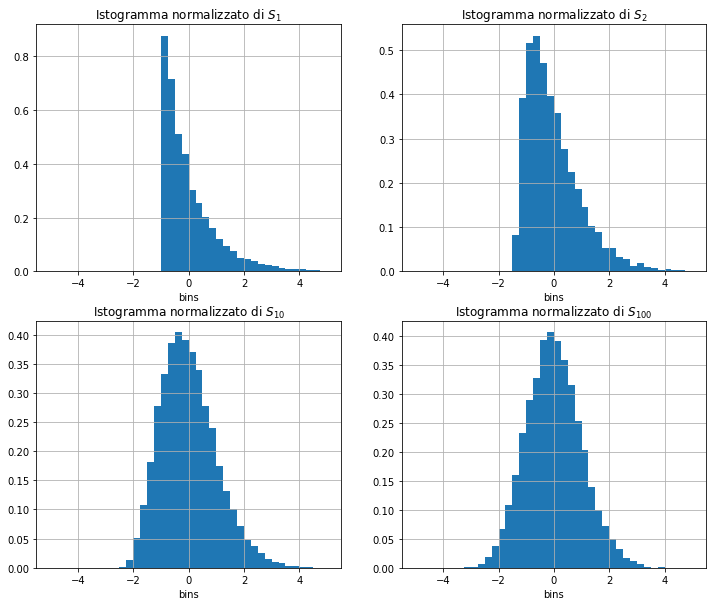

I parametri del fit sono:
0.4007066565998997 0.48182144837136226 -0.04920471869006369 

I parametri di una normale N(0, 1) sono:
0.3989422804014327 0.5 0


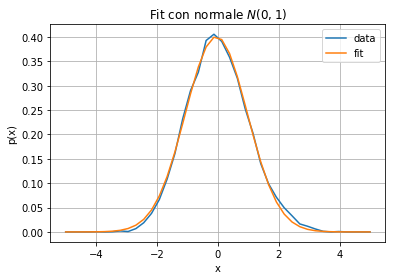

In [4]:
# Il procedimento è identico alla cella precedente: utilizzo lo stesso numero di bin
# e la stessa width
n_bins = 40
width = 5

xI, xII, xV, xC = np.loadtxt("Exp_dice.out", usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

# Cambiano invece i due momenti della distribuzione
mean =1
sigma = 1

# Introduco variabili normalizzate
xI_n = (xI - mean)/sigma
xII_n = (xII - mean)/(sigma/(math.sqrt(2)))
xV_n = (xV - mean)/(sigma/(math.sqrt(10)))
xC_n = (xC - mean)/(sigma/(math.sqrt(100)))

v = [xI_n, xII_n, xV_n, xC_n]

attr = ['Istogramma normalizzato di $S_1$',
        'Istogramma normalizzato di $S_2$', 
        'Istogramma normalizzato di $S_{10}$',
        'Istogramma normalizzato di $S_{100}$' ]

inst = plt.figure(figsize = (12, 10))
for i in range(4):
    graph = inst.add_subplot(2, 2, i+1)
    n, bins, patches = graph.hist(v[i], n_bins, density=True, range=(-width, width))
    plt.xlabel('bins')
    plt.title(attr[i])
    plt.grid(True)

plt.show()


N = len(n)
x = np.linspace(-width, width, N,endpoint=True)

plt.plot(x, n, label = 'data')

p_opt, p_cov = curve_fit(f, x, n) 
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label = 'fit') 

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Fit con normale $N(0, 1)$')
plt.legend()
plt.grid(True)

print('I parametri del fit sono:')
print(p_opt[0], p_opt[1], p_opt[2], '\n') 
print('I parametri di una normale N(0, 1) sono:')
print(1/np.sqrt(2*math.pi), 1/2, 0)

### 3. Distribuzione Lorentziana  $p(x) = \frac{1}{\pi} \frac{1}{x^2 + 1},  x \in (-\infty, \infty)$

Nel caso della lorentziana ricordiamo che la varianza $\sigma^2$ non è definita. Per plottare l'istogramma quindi ci limitiamo a sottrarre la media (che in questo caso è $0$). 

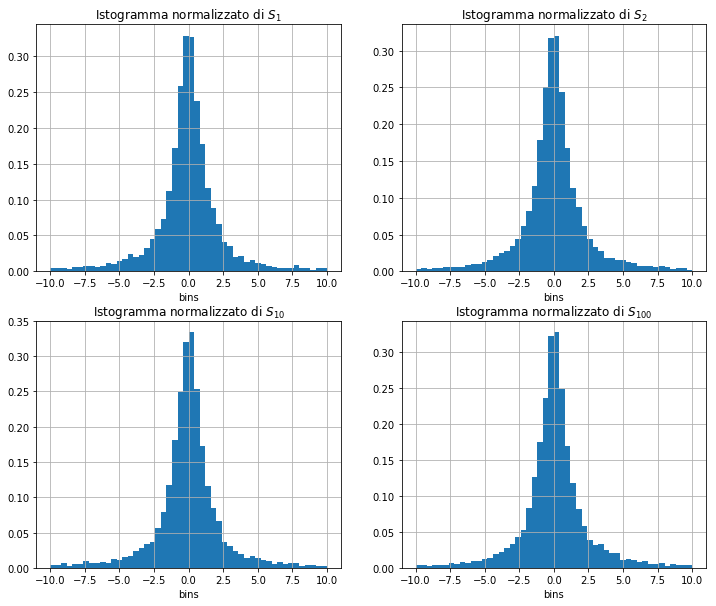

I parametri del fit con una Lorentziana sono:
0.009540109828534432 0.9513186429054756 

I parametri di una Lorentziana sono:
0 1 

I parametri del fit con una Gaussiana sono:
0.29880522050582126 0.3926034122696958 -0.0016416736184894092 

I parametri di una normale N(0, 1) sono:
0.3989422804014327 0.5 0


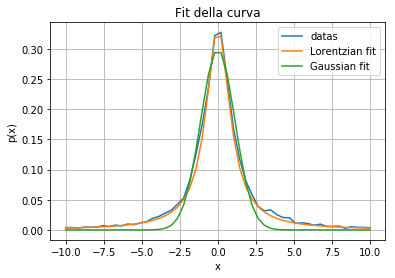

In [21]:
xI, xII, xV, xC = np.loadtxt("Lor_dice.out", usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

# Cambio il numero di bin e la width rispetto ai casi precedenti
n_bins=50
width = 10

# Come anticipato in questo caso non necssito di variabili normalizzate, poichè la
# varianza non è definita e la media è nulla.
v = [xI, xII, xV, xC]
attr = ['Istogramma normalizzato di $S_1$',
        'Istogramma normalizzato di $S_2$', 
        'Istogramma normalizzato di $S_{10}$',
        'Istogramma normalizzato di $S_{100}$' ]

inst = plt.figure(figsize = (12, 10))
for i in range(4):
    graph = inst.add_subplot(2, 2, i+1)
    n, bins, patches = graph.hist(v[i], n_bins, density=True, range=(-width, width))
    plt.xlabel('bins')
    plt.title(attr[i])
    plt.grid(True)

plt.show()

N = len(n)
x = np.linspace(-width, width,N,endpoint=True)

plt.plot(x, n, label="datas")

# Il fit viene qui effettuato sia con una Gaussiana che con una Lorentziana, per mostrare 
# come in questo caso sia la seconda a fornire un risultato migliore.
p_opt, p_cov = curve_fit(L, x, n) 
y_fit = L(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, label="Lorentzian fit") 

print('I parametri del fit con una Lorentziana sono:')
print(p_opt[0], p_opt[1],'\n') 
print('I parametri di una Lorentziana sono:')
print(0, 1, '\n')

p_opt, p_cov = curve_fit(f, x, n) 
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label="Gaussian fit") 

print('I parametri del fit con una Gaussiana sono:')
print(p_opt[0], p_opt[1], p_opt[2], '\n') 
print('I parametri di una normale N(0, 1) sono:')
print(1/np.sqrt(2*math.pi), 1/2, 0)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Fit della curva')
plt.legend()
plt.grid(True)

### Conclusioni

Nei primi due casi si osserva in maniera chiara la convergenza ad una curva Gaussiana, e questo è confermato dai fit che sono sempre molto precisi: i valori dei parametri del fit sono molto vicini ai valori esatti degli stessi parametri per una curva normale $\mathcal{N}(0, 1)$.

Nel terzo caso si osserva invece come la Lorentziana sia "invariante" sotto questa procedura, esattamente come lo sarebbe una gaussiana. Questo testimonia la generalizzazione del teorema del limite centrale: nello spazio delle distribuzioni di probabilità la gaussiana non è l'unico attrattore (lo è per quelle distribuzioni di probabilità che ammettono momento primo e secondo finiti). Il fit dei dati in quest'ultimo caso mette in mostra ancora una volta questo fatto.